In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats

In [7]:
weather_df = pd.read_csv("E://95788//weather_hours_stormglass.csv")

In [12]:
weather_df["hour"] = weather_df.time.str[11:13]

In [13]:
weather_df.head()

,Unnamed: 0,time,airTemperature.dwd,airTemperature.noaa,airTemperature.sg,airTemperature.smhi,secondarySwellDirection.noaa,secondarySwellDirection.sg,secondarySwellHeight.noaa,secondarySwellHeight.sg,...,swellPeriod.sg,windDirection.icon,windDirection.noaa,windDirection.sg,windDirection.smhi,windSpeed.icon,windSpeed.noaa,windSpeed.sg,windSpeed.smhi,hour
0,0,2020-11-18T16:00:00+00:00,11.16,12.15,11.8,11.8,114.71,114.71,0.35,0.35,...,5.90,223.74,226.88,213.0,213.0,10.81,8.38,5.5,5.5,16
1,1,2020-11-18T17:00:00+00:00,11.04,12.04,11.9,11.9,114.71,114.71,0.35,0.35,...,5.93,223.90,225.72,218.0,218.0,10.87,8.67,5.1,5.1,17
2,2,2020-11-18T18:00:00+00:00,10.68,11.93,11.9,11.9,114.71,114.71,0.35,0.35,...,5.96,224.06,224.55,224.0,224.0,10.94,8.97,5.3,5.3,18
3,3,2020-11-18T19:00:00+00:00,10.51,11.67,12.0,12.0,114.71,114.71,0.35,0.35,...,6.02,220.46,223.97,234.0,234.0,11.67,9.43,6.8,6.8,19
4,4,2020-11-18T20:00:00+00:00,10.32,11.40,11.8,11.8,114.71,114.71,0.35,0.35,...,6.09,216.85,223.38,229.0,229.0,12.41,9.88,6.2,6.2,20


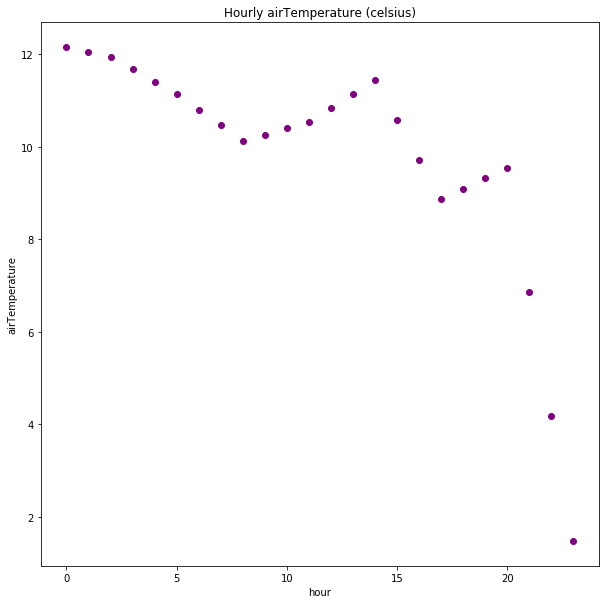

In [58]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(weather_df.index.values,
           weather_df["airTemperature.noaa"],
           color='purple')

ax.set(xlabel="hour",
       ylabel="airTemperature",
       title="Hourly airTemperature (celsius)")

plt.show()

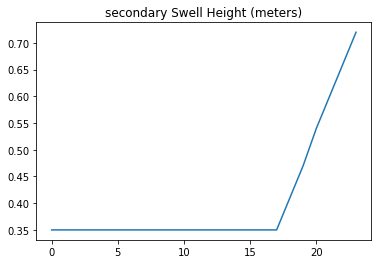

In [59]:
weather_df["secondarySwellHeight.noaa"].plot(title='secondary Swell Height (meters)')

In [33]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    24 non-null     int64  
 1   time                          24 non-null     object 
 2   airTemperature.dwd            24 non-null     float64
 3   airTemperature.noaa           24 non-null     float64
 4   airTemperature.sg             24 non-null     float64
 5   airTemperature.smhi           24 non-null     float64
 6   secondarySwellDirection.noaa  24 non-null     float64
 7   secondarySwellDirection.sg    24 non-null     float64
 8   secondarySwellHeight.noaa     24 non-null     float64
 9   secondarySwellHeight.sg       24 non-null     float64
 10  secondarySwellPeriod.noaa     24 non-null     float64
 11  secondarySwellPeriod.sg       24 non-null     float64
 12  swellDirection.dwd            24 non-null     float64
 13  swellDi

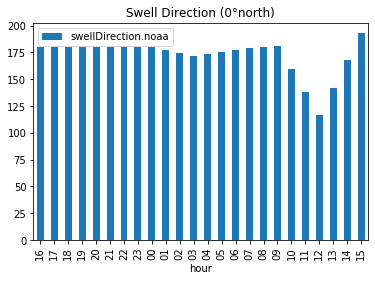

In [60]:
weather_df.plot(kind='bar', y='swellDirection.noaa', x='hour', title='Swell Direction (0°north)')
plt.show()

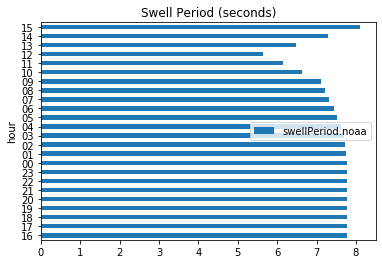

In [62]:
weather_df.plot(kind='barh', y='swellPeriod.noaa', x='hour', title='Swell Period (seconds)')
plt.show()

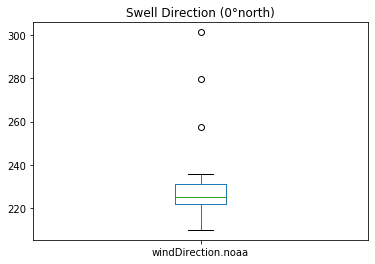

In [63]:
weather_df.plot.box(y='windDirection.noaa', title='Swell Direction (0°north)')
plt.show()

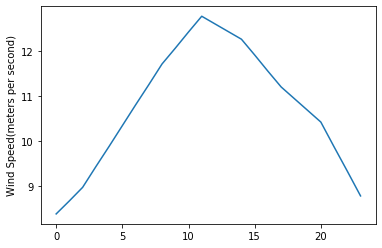

In [67]:
plt.plot(weather_df["windSpeed.noaa"])
plt.ylabel("Wind Speed(meters per second)");

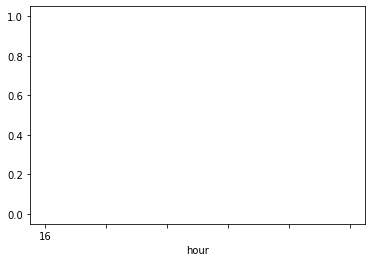

In [53]:
Henley Beach -34.92029, 138.49442
Glenelg Beach-34.9910  138.5190.
# Brettys right
# The Point 52.3085° N, -6.3880 ????
# Tunks 31.2859° N, -92.6264° W  ????
Burleith Heads -28.1040° , 153.4360° E
Bells -38.3669° , 144.2847° E
Brunswick Heads  -28.5333  153.5500

In [69]:
location = {'name':['Henley Beach','Glenelg Beach','Burleith Heads','Bells','Brunswick Heads'],
       'lat':[-34.92029,-34.9910,-28.1040,-38.3669,-28.5333],
       'long':[138.49442,138.5190,153.4360,144.2847,153.5500]}
location_df = pd.DataFrame(location)

In [70]:
location_df.head()

,name,lat,long
0,Henley Beach,-34.92029,138.49442
1,Glenelg Beach,-34.99100,138.51900
2,Burleith Heads,-28.10400,153.43600
3,Bells,-38.36690,144.28470
4,Brunswick Heads,-28.53330,153.55000


In [74]:
BBox = (location_df['long'].min(),   location_df['long'].max(),      
         location_df['lat'].min(), location_df['lat'].max())

In [75]:
BBox

(138.49442, 153.55, -38.3669, -28.104)

In [87]:
location_map = plt.imread('E:\\95788\\Mymap.png')

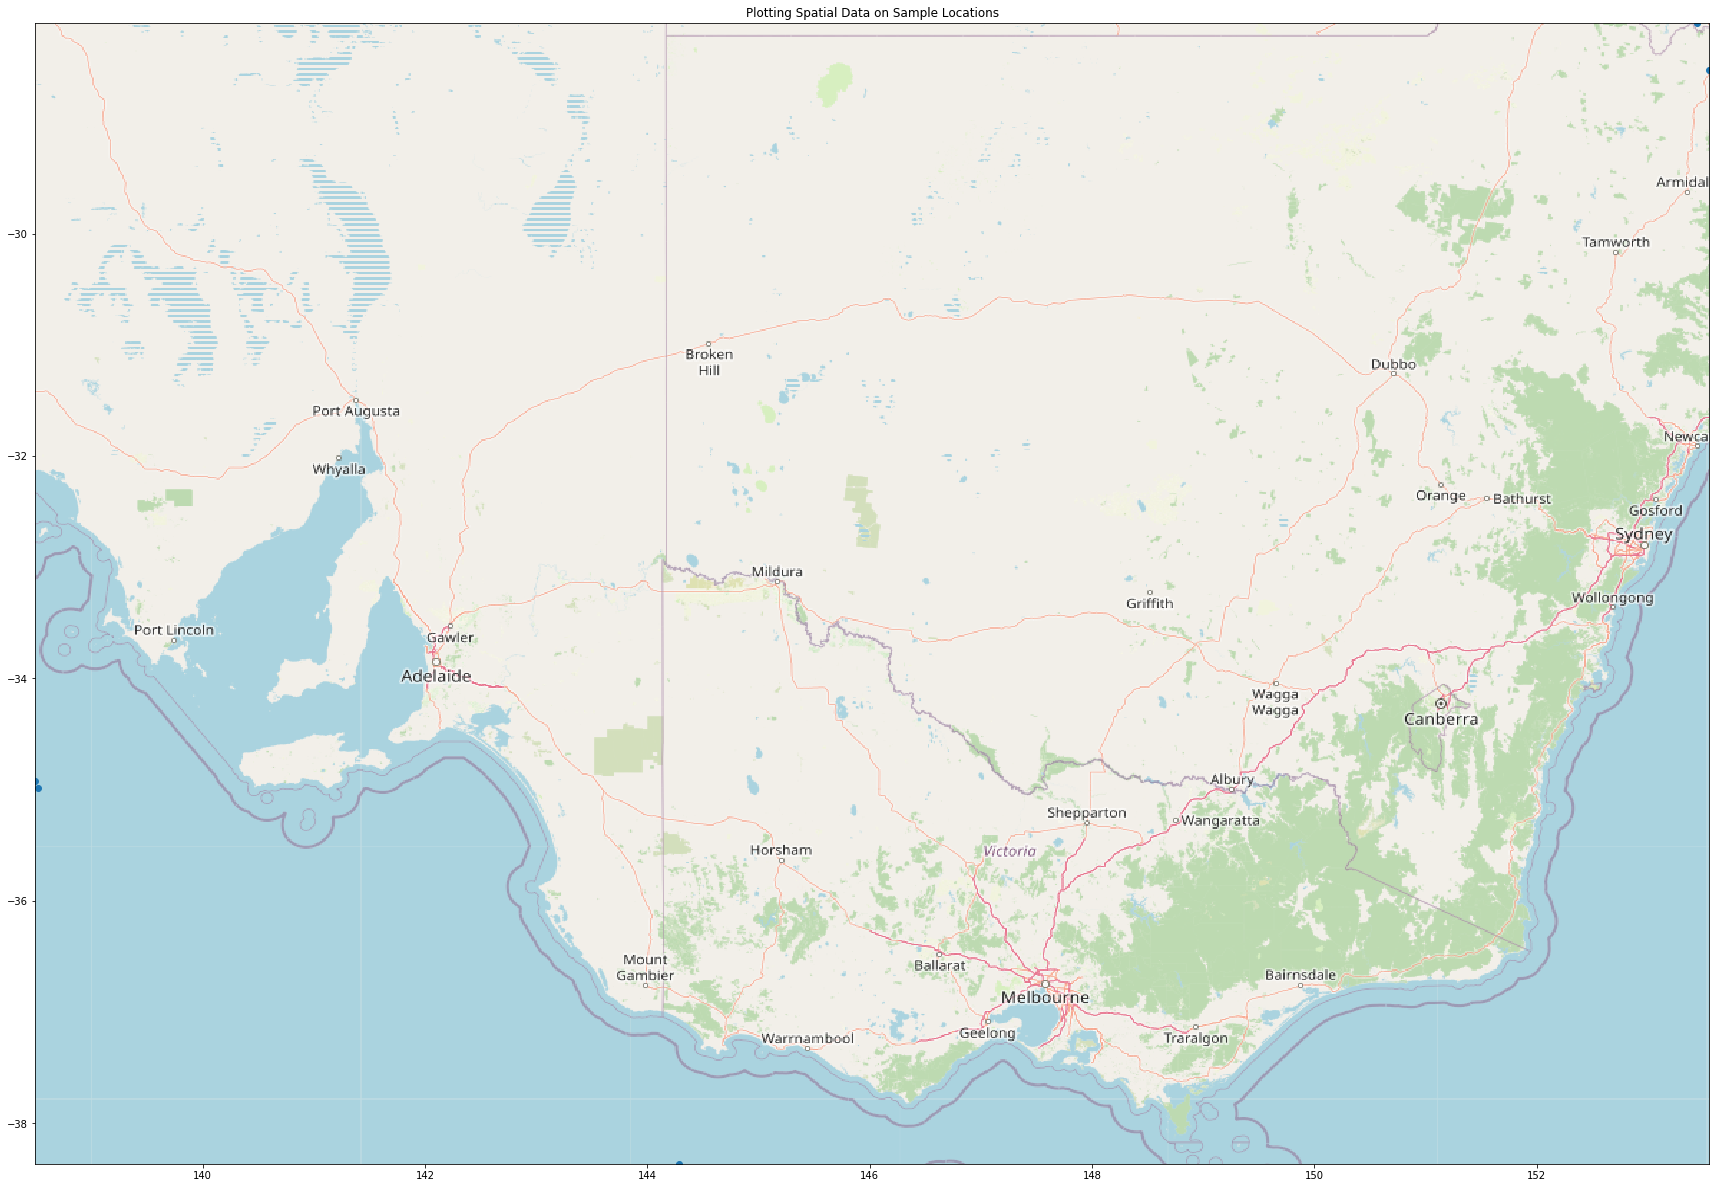

In [96]:
fig, ax = plt.subplots(figsize = (30,30))
ax.scatter(location_df.long, location_df.lat)
ax.set_title('Plotting Spatial Data on Sample Locations')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(location_map, zorder=0, extent = BBox, aspect= 'equal')

In [99]:
import plotly.graph_objects as go

In [105]:
fig = go.Figure(data=go.Scattergeo(
        lon = location_df['long'],
        lat = location_df['lat'],
        text = location_df['name'],
        mode = 'markers',
        marker_color = 'blue',
        ))

fig.update_layout(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        geo_scope='world',
    )
fig.show()

In [116]:
from mpl_toolkits.basemap import Basemap

In [121]:
location_df

,name,lat,long
0,Henley Beach,-34.92029,138.49442
1,Glenelg Beach,-34.99100,138.51900
2,Burleith Heads,-28.10400,153.43600
3,Bells,-38.36690,144.28470
4,Brunswick Heads,-28.53330,153.55000


In [124]:
location_df.loc[0]['name']

'Henley Beach'

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



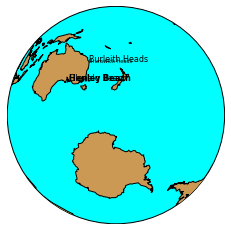

<Figure size 3600x3600 with 0 Axes>

In [144]:
map = Basemap(projection='ortho', 
              lat_0=-60, lon_0=170)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='#cc9955',lake_color='aqua')
map.drawcoastlines()

lon = location_df.loc[0]['long']
lat = location_df.loc[0]['lat']

x, y = map(lon, lat)

plt.text(x, y, location_df.loc[0]['name'],fontsize=8,fontweight='bold',color='k')

lon = location_df.loc[1]['long']
lat = location_df.loc[1]['lat']

x, y = map(lon, lat)

plt.text(x, y, location_df.loc[1]['name'],fontsize=8,color='k')

lon = location_df.loc[2]['long']
lat = location_df.loc[2]['lat']

x, y = map(lon, lat)

plt.text(x, y, location_df.loc[2]['name'],fontsize=8,color='k')

lon = location_df.loc[3]['long']
lat = location_df.loc[3]['lat']

x, y = map(lon, lat)

plt.text(x, y, location_df.loc[3]['name'],fontsize=5,ha='left',va='bottom',color='k')

lon = location_df.loc[4]['long']
lat = location_df.loc[4]['lat']

x, y = map(lon, lat)

plt.text(x, y, location_df.loc[4]['name'],fontsize=5,color='k')
plt.figure(figsize=(50, 50))
plt.show()

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



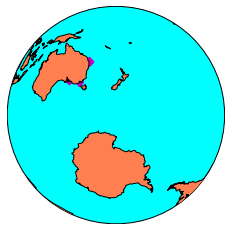

In [151]:
map = Basemap(projection='ortho', 
              lat_0=-60, lon_0=170)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

lons = location_df['long'].values
lats = location_df['lat'].values

x, y = map(lons, lats)

map.scatter(x, y, marker='D',color='m')

plt.show()

In [152]:
type(location_df['long'])

pandas.core.series.Series